___
# Atividade: Modelos probabilísticos contínuos e Dados
___

## Aula 14

**Preparo Prévio:**
1. Leitura prévia necessária: Magalhães e Lima (7ª. Edição): Modelo Normal (pág. 197 a 201).
2. Executar o arquivo `Aula13 Modelos probabilísticos contínuos.ipynb`
3. Leitura prévia necessária: Magalhães e Lima (7ª. Edição): Gráfico de quantis ou QQplot (pág. 27 - Exemplo 1.10 e 1.11).
4. Leitura prévia necessária: Magalhães e Lima (7ª. Edição): Gráfico de probabilidade (similar ao gráfico QQplot) (pág. 201 a 204) - Exemplo 6.10).

**Hoje:**
1. Reforçar mais ferramentas para Análise Descritiva
2. Avaliar, descritivamente, adequação da normal aos dados.
3. Contrastar resultados teóricos e empíricos.


**Próxima aula:**
1.	Leitura prévia necessária: Magalhães e Lima (7ª. Edição): Seção 5.1 (pág. 137) e Seção 5.2 (pág. 146).
___

___
## <font color='blue'>Padaria </font>

Uma empresa deve decidir onde construir uma padaria: <font color='green'>Bairro A </font> ou <font color='orange'> Bairro B </font>. 

Como ambos os bairros possuem densidades populacionais próximas, os investidores visam atingir um público alvo de maior renda familiar. 
Assim, quanto maior o número de famílias com rendas familiares mais altas, maior será a chance do empreendimento ser bem sucedido. 

Considerando que a decisão final seja baseada em informações sobre a renda familiar dos moradores desses dois bairros, responda:

1. Calcule algumas medidas resumo úteis para entender o comportamento dessa variável em ambos os bairros. Analise.

2. Construa o histograma dos dados e compare as distribuições de renda familiar (em mil reais) dos dois bairros. Qual é o melhor bairro para construir a padaria? Justifique.

3. Construa o QQ-Plot considerando quantil amostral do Bairro A vs quantil amostral do Bairro B. Esse gráfico de quantis amostrais auxilia a responder qual é o melhor bairro para construir a padaria? Justifique claramente.
   Dica: veja construção desse gráfico no Magalhães e Lima (7ª edição) - pág. 27 e 29.

3. Assuma que $X$: renda familiar de um determinado bairro tenha $\mu$ estimada pela média amostral ($\bar{x}$) e tenha $\sigma^2$ estimada pela variância amostral, ambas de um mesmo bairro em questão. Verifique, visualmente/graficamente, se a distribuição normal é adequada para estimar a renda familiar de cada bairro. Para isso, interprete os seguintes gráficos:
      1. Construa o histograma dos dados junto com a fdp da distribuição normal e analise.
      
      2. Construa o Gráfico de probabilidade considerando o quantil amostral vs o quantil teórico da distribuição normal. Interprete esse gráfico com intuito de avaliar se: A renda de cada bairro é bem modelada por uma distribuição normal?
      Dica: veja Exemplo 6.8 do Magalhães e Lima (7ª. edição) de como obter as frequências relativas acumuladas a partir de uma amostra de tamanho n=500 (de cada bairro). Os quantis teóricos da distribuição normal podem ser obtidos pelo comando `stats.norm.ppf(p, loc=mu, scale=sigma)`, sendo `p` a frequencia relativa acumulada  obtida anteriormente.
      
      4. Construa um gráfico dos valores observados vs frequência relativa acumulada (a partir dos dados) e vs função de distribuição acumulada.
   
4. Independente da sua resposta do item anterior, assuma que $X$: renda familiar de um determinado bairro segue uma distribuição normal considerando as estimativas amostrais como valores dos parâmetros de cada bairro. Nesse caso, para cada bairro, calcule:
      1. probabilidade de uma família possuir renda familiar maior do que 17 mil reais.

      2. sabendo que a famíliar tem mais do que 15 mil reais de renda familiar, qual a probabilidade dessa possuir renda inferior a 16 mil reais.
      
      3. qual a menor renda familiar dos 5% das famílias que mais ganham em cada bairro? 



In [48]:
%matplotlib inline

import os
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
from numpy import mean, var, arange
import numpy as np

print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\Usuario\Anaconda3\Scripts


In [18]:
dados = pd.read_excel("C:\\Users\\Usuario\\Documents\\Insper\\C.D\\DP\\aula14\\Padaria.xlsx")

In [41]:
df = pd.DataFrame()

In [19]:
dados.describe()

,A,B
count,500.000000,500.000000
mean,15.321676,14.221997
std,0.592599,1.840182
min,13.450880,9.704160
25%,14.919380,12.843832
50%,15.335840,14.348205
75%,15.702140,15.770295
max,17.151280,18.911520


______

In [43]:
df['A'] = sorted(dados.A)
df['B'] = sorted(dados.B)

In [49]:
k = 22.3
a = (18.911520 - 9.704160)/k

faixa = np.arange(9.704160, 18.911520, a)

(0, 0.7)

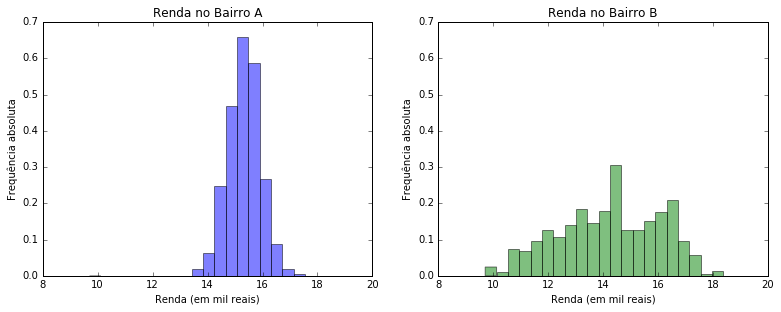

In [113]:
fig = plt.figure(figsize = (13, 10))

plt.subplot(221)
plot = dados.A.plot.hist(bins = faixa, title = 'Renda no Bairro A', figsize = (13, 10), alpha = 0.5, color = 'b', normed = 1)
plt.ylabel('Frequência absoluta')
plt.xlabel('Renda (em mil reais)')
plt.ylim(0, 0.7)

plt.subplot(222)
plot = dados.B.plot.hist(bins = faixa, title = 'Renda no Bairro B', figsize = (13, 10), alpha = 0.5, color = 'g', normed = 1)
plt.ylabel('Frequência absoluta')
plt.xlabel('Renda (em mil reais)')
plt.ylim(0, 0.7)

______

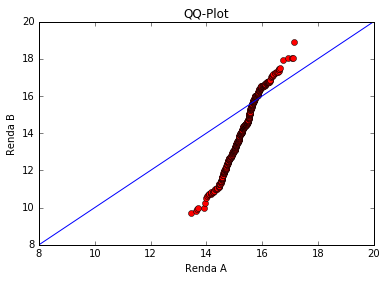

In [97]:
plt.plot(df.A, df.B, 'ro')
plt.plot((8, 20), (8, 20))
plt.title('QQ-Plot')
plt.xlabel('Renda A')
plt.ylabel('Renda B')

A renda A é maior até aproximadamente 75% das rendas mais baixas.

______

In [103]:
mu1 = dados.A.mean()
mu2 = dados.B.mean()

sigma1 = (dados.A.var())**0.5
sigma2 = (dados.B.var())**0.5

(0, 0.7)

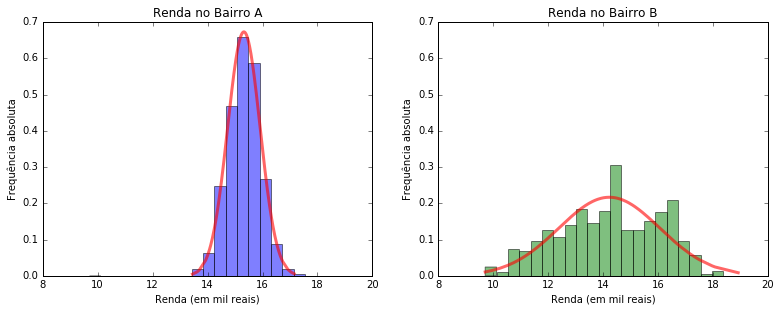

In [114]:
fig = plt.figure(figsize = (13, 10))

plt.subplot(221)
plot = dados.A.plot.hist(bins = faixa, title = 'Renda no Bairro A', figsize = (13, 10), alpha = 0.5, color = 'b', normed = 1)
plt.plot(df.A, stats.norm.pdf(df.A, loc = mu1, scale = sigma1), lw = 3, alpha = 0.6, color = 'r')
plt.ylabel('Frequência absoluta')
plt.xlabel('Renda (em mil reais)')

plt.subplot(222)
plot = dados.B.plot.hist(bins = faixa, title = 'Renda no Bairro B', figsize = (13, 10), alpha = 0.5, color = 'g', normed = 1)
plt.plot(df.B, stats.norm.pdf(df.B, loc = mu2, scale = sigma2), lw = 3, alpha = 0.6, color = 'r')
plt.ylabel('Frequência absoluta')
plt.xlabel('Renda (em mil reais)')
plt.ylim(0, 0.7)

In [129]:
n = 500
fra = []

for i in range(500):
    fac = (i + 0.5)/n
    fra.append(f)

In [135]:
qa = []
qb = []

for i in fra:
    qa.append(stats.norm.ppf(fra, loc = mu1, scale = sigma1))
    qb.append(stats.norm.ppf(fra, loc = mu2, scale = sigma2))